In [169]:
import pandas as pd

inflation=pd.read_csv("inflation.csv")
unemployment=pd.read_csv("unemployment.csv")   #needs aggregation

In [170]:
inflation.columns = ['year', 'inflation']
unemployment.columns = ['year', 'unemployment']

In [171]:
unemployment.head(15)

,year,unemployment
0,1960-01-01,5.2
1,1960-02-01,4.8
2,1960-03-01,5.4
3,1960-04-01,5.2
4,1960-05-01,5.1
5,1960-06-01,5.4
6,1960-07-01,5.5
7,1960-08-01,5.6
8,1960-09-01,5.5
9,1960-10-01,6.1


In [172]:
inflation.head(15)

,year,inflation
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912
5,1965-01-01,1.585169
6,1966-01-01,3.015075
7,1967-01-01,2.772786
8,1968-01-01,4.271796
9,1969-01-01,5.462386


In [173]:
type(inflation.iloc[0,0])

str

In [174]:
unemployment['year']=unemployment['year'].str[:4]

In [175]:
unemployment.head(1)

,year,unemployment
0,1960,5.2


In [176]:
inflation['year']=inflation['year'].str[:4]
inflation.head(1)

,year,inflation
0,1960,1.457976


In [177]:
print(unemployment.shape)   #columns, rows

(769, 2)


In [178]:
print(len(unemployment))

769


In [179]:
print(769/12)

64.08333333333333


In [180]:
print(64*12)

768


In [181]:
inflation.shape

(63, 2)

In [182]:
unemployment_yearly = pd.DataFrame(columns=['year', 'unemployment'])

In [183]:
#for i in range(len(unemployment)):
#    print(unemployment.iloc[i,1])    #rows, columns

In [184]:
unemployment_yearly.iloc[:,0]=inflation.iloc[:,0]

unemployment_yearly.tail(3)

,year,unemployment
60,2020,NaN
61,2021,NaN
62,2022,NaN


In [185]:
unemployment.tail(3)

,year,unemployment
766,2023,3.7
767,2023,3.7
768,2024,3.7


In [186]:
a = pd.DataFrame({
    'year': ["2023","2024"],
    'unemployment': [99,3.7]
})
unemployment_yearly = pd.concat([unemployment_yearly, a], ignore_index=True)
#unemployment_yearly=unemployment_yearly.concat({year: 2023, unemployment: 99}, ignore_index=True)
#unemployment_yearly=unemployment_yearly.concat({year: 2024, unemployment: 99}, ignore_index=True)

C:\Users\THW\AppData\Local\Temp\ipykernel_5488\3339249966.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  unemployment_yearly = pd.concat([unemployment_yearly, a], ignore_index=True)


In [187]:
unemployment_yearly.tail(3)

,year,unemployment
62,2022,NaN
63,2023,99.0
64,2024,3.7


In [188]:
inflation.tail(3)

,year,inflation
60,2020,1.233584
61,2021,4.697859
62,2022,8.002800


In [189]:
for i in range(64):
    print(i,"   ",unemployment.iloc[i*12:(i+1)*12,1].mean())

0     5.541666666666667
1     6.691666666666666
2     5.566666666666667
3     5.641666666666667
4     5.158333333333334
5     4.508333333333334
6     3.7916666666666665
7     3.8416666666666663
8     3.558333333333333
9     3.4916666666666667
10     4.983333333333333
11     5.95
12     5.6000000000000005
13     4.858333333333333
14     5.641666666666667
15     8.475
16     7.699999999999999
17     7.050000000000001
18     6.066666666666666
19     5.8500000000000005
20     7.175000000000001
21     7.616666666666667
22     9.708333333333334
23     9.6
24     7.508333333333334
25     7.191666666666666
26     7.0
27     6.175000000000001
28     5.491666666666666
29     5.258333333333333
30     5.616666666666667
31     6.8500000000000005
32     7.491666666666667
33     6.908333333333332
34     6.099999999999999
35     5.591666666666666
36     5.408333333333334
37     4.941666666666667
38     4.499999999999999
39     4.216666666666668
40     3.9666666666666663
41     4.741666666666667
42    

In [190]:
for i in range(64):
    unemployment_yearly.iloc[i,1]=unemployment.iloc[i*12:(i+1)*12,1].mean()
unemployment_yearly.tail(5)

,year,unemployment
60,2020,8.091667
61,2021,5.350000
62,2022,3.633333
63,2023,3.625000
64,2024,3.700000


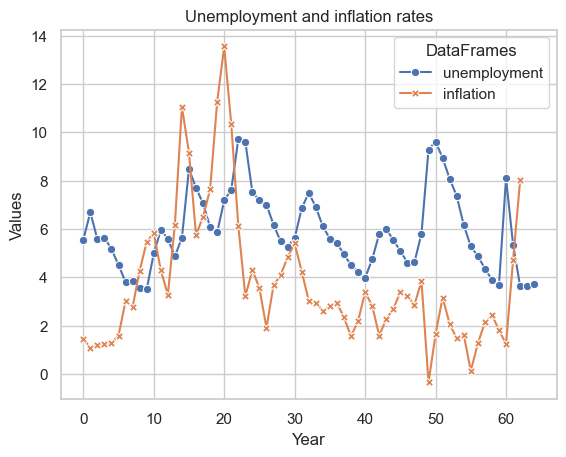

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = unemployment_yearly
df2 = inflation

# Merge the two DataFrames
merged_df = pd.concat([df1['unemployment'], df2['inflation']], axis=1)
merged_df.columns = ['unemployment', 'inflation']

# Plotting with Seaborn
sns.set(style="whitegrid")
sns.lineplot(data=merged_df, markers=True, dashes=False)

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Unemployment and inflation rates')
plt.legend(title='DataFrames')
plt.show()